## Import libs, set paths and load params

In [9]:
import os, glob
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "../src")
import auxilary_functions as f
from generation_algorithm import *
import subprocess
import csv
import matplotlib.pyplot as plt

cfg = f.get_actual_parametrization("../src/config.json")

ffl_percentages = np.linspace(0.1, 0.5, num=20)
#ffl_percentages = np.linspace(0.1, 0.5, num=2)
sizes = ['250', '500', '750', '1000', '1500', '2000']
sizes = ['1500']
sizes = ['2000']
#sizes = ['250']

os.chdir('../networks/')
fflattdir = '../snippets/'

print(ffl_percentages)

[0.1        0.12105263 0.14210526 0.16315789 0.18421053 0.20526316
 0.22631579 0.24736842 0.26842105 0.28947368 0.31052632 0.33157895
 0.35263158 0.37368421 0.39473684 0.41578947 0.43684211 0.45789474
 0.47894737 0.5       ]


In [10]:
print(os.getcwd())
current_dir = os.path.join(os.getcwd())

/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks


In [1]:
#collect data
time_list = []
for network_size in sizes:
    
    for percentage in ffl_percentages:
                   
        sys.path.insert(0, "../snippets")
            
        from test import load_ffl_based_component
        yeast_matrix, ffl_motif, ffl_component, ffl_matrix = load_ffl_based_component()
        growth_rate = 0.9
        core_size = 25
        network_size = int(network_size)
        print('running fflatt...')
        
        artificial_matrix_ffl, time_generation, p1_nodes = generate_artificial_network(
                        yeast_matrix, motifs=ffl_motif, motifs_network=ffl_component,
                        reference_matrix=ffl_matrix, growth_pace=growth_rate,
                        network_size=network_size, nucleus_size=core_size,
                        growth_barabasi=percentage)
            
        time_list.append([network_size,time_generation,p1_nodes])

NameError: name 'sizes' is not defined

In [4]:
time_list = pd.DataFrame(time_list, columns = ['size', 'time', 'p1-nodes'])
time_list

,size,time,p1-nodes
0,1500,112.325065,0.922000
1,1500,160.054097,0.896000
2,1500,158.982806,0.896000
3,1500,169.757724,0.852667
4,1500,1998.916954,0.920667
5,1500,212.768062,0.860667
6,1500,258.209681,0.849333
7,1500,330.448087,0.825333
8,1500,312.264462,0.804667
9,1500,356.284302,0.819333


In [5]:
time_list.to_csv('run_time.csv', mode='a', index=False, header=True)

## Plot time

In [57]:
runtime_df = pd.read_csv('run_time.csv')
runtime_df['time'] = np.log2(runtime_df['time'])

In [58]:
bins = [0.6,0.7,0.8,0.9]
labels = ['cat{}'.format(x) for x in range(1, len(bins))]
binned = pd.cut(runtime_df['p1-nodes'], bins=bins, labels=labels)

In [59]:
runtime_df_binned = runtime_df

In [60]:
runtime_df_binned['FFL-nodes-perc'] = binned

In [61]:
runtime_df_binned

,network_size,time,p1-nodes,FFL-nodes-perc
0,250,3.376167,0.900000,cat3
1,250,3.224734,0.860000,cat3
2,250,3.210127,0.864000,cat3
3,250,3.298917,0.856000,cat3
4,250,3.407515,0.792000,cat2
...,...,...,...,...
95,1500,9.579632,0.752000,cat2
96,1500,10.059250,0.737333,cat2
97,1500,10.485791,0.640667,cat1
98,1500,10.775658,0.644667,cat1


In [62]:
categories = runtime_df_binned.groupby('FFL-nodes-perc')

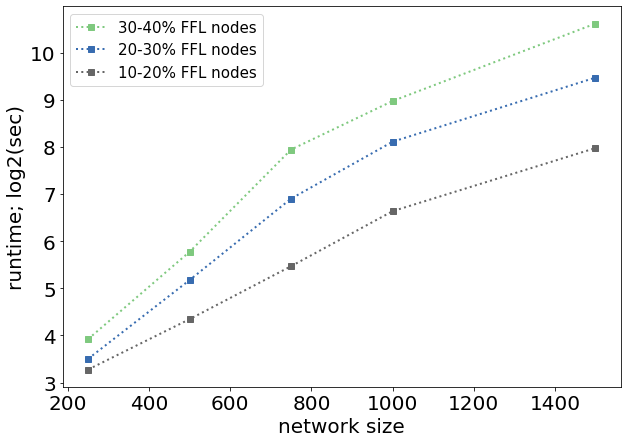

In [119]:
runtime_df_binned.groupby(["FFL-nodes-perc", "network_size"]).agg(np.mean).unstack(0).\
    plot(kind = "line", y = "time", style='s:', lw=2, legend = True,
         cmap='Accent', figsize = (10,7),\
         xlabel="network size", ylabel="runtime; log2(sec)")

L=plt.legend(prop={'size': 15})
L.get_texts()[0].set_text('30-40% FFL nodes')
L.get_texts()[1].set_text('20-30% FFL nodes')
L.get_texts()[2].set_text('10-20% FFL nodes')

plt.rcParams.update({'font.size': 20})
plt.savefig("figure6.png")
plt.show()

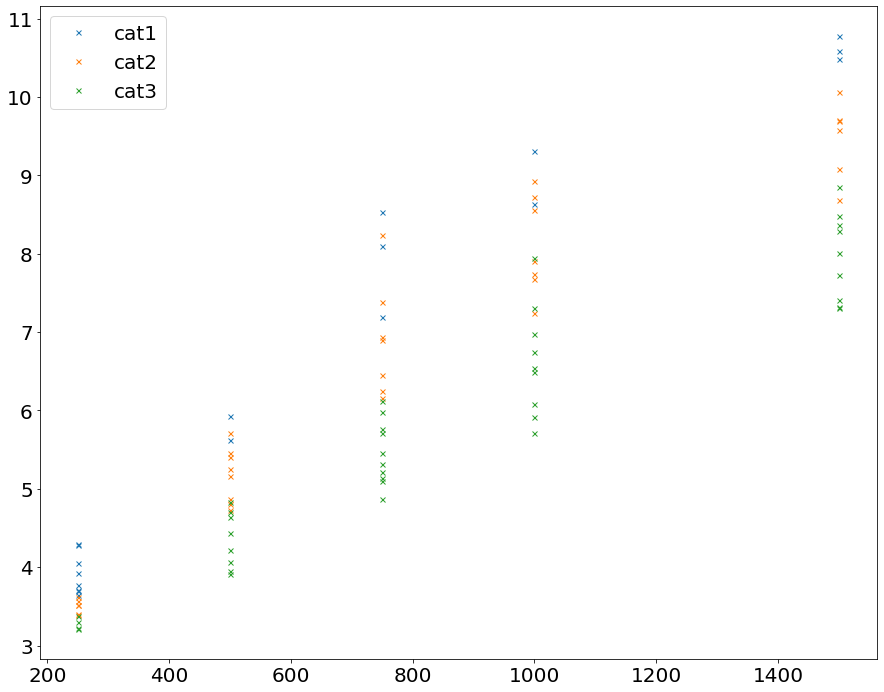

In [118]:
fig, ax = plt.subplots(figsize=(15,12))
for name, group in categories:
    ax.plot(group.network_size, group.time, marker='x', linestyle='', ms=5, label=name)
ax.legend()
plt.show()